# Imports

In [212]:
import functools
import os
import gzip
import pandas as pd

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)

# Read data to df

In [97]:
df = pd.read_csv(gzip.open(os.path.join('data', 'events.csv.gz')),
                 delimiter='|', parse_dates=['start_time'])
df.head()

/home/inonpe/jupyter/dtu_visualization_d3_course/project/py/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,26,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,source,start_time,end_time,latitude,longitude,postal_code,all_day,free,featured,...,venue_escaped,address_escaped,description_escaped,categories_escaped,tags_escaped,recurrent_escaped,performers_escaped,price_escaped,url_escaped,city_escaped
0,E0-001-094943257-4,eventful,2016-08-19 19:00:00,NaN,40.700800,-73.713300,NaN,0.0,NaN,NaN,...,NuSpecies,NaN,"In this workshop, Beverley Leon, one of NuSpe...",{u'category': [{u'name': u'Health &amp; Wellne...,NaN,NaN,NaN,NaN,http://newyorkcity.eventful.com/events/digesti...,Elmont
1,E0-001-094206304-7,eventful,2016-08-27 21:00:00,NaN,40.721321,-73.988212,10002,0.0,NaN,NaN,...,Arlene's Grocery,NaN,<br>,{u'category': [{u'name': u'Other &amp; Miscell...,NaN,NaN,NaN,$10.00,http://newyorkcity.eventful.com/events/disconn...,New York
2,E0-001-092628830-9,eventful,2016-07-15 20:00:00,NaN,40.719288,-73.961708,11211,0.0,NaN,NaN,...,Music Hall of Williamsburg,NaN,NaN,{u'category': [{u'name': u'Concerts &amp; Tour...,NaN,NaN,"{u'performer': {u'name': u'Emily King', u'crea...",25.00 - 25.00,http://newyorkcity.eventful.com/events/emily-k...,Brooklyn
3,E0-001-093348618-5,eventful,2016-06-28 18:00:00,NaN,40.668600,-74.114700,NaN,0.0,NaN,NaN,...,Dorothy Harrington Council Chambers,NaN,NaN,"{u'category': [{u'name': u'Neighborhood', u'id...",NaN,NaN,NaN,NaN,http://newyorkcity.eventful.com/events/cancell...,Bayonne
4,E0-001-095381670-0,eventful,2016-08-08 19:00:00,NaN,40.742716,-73.992934,NaN,0.0,NaN,NaN,...,3 Sheets Saloon,NaN,Join us for the 4th year of helping kids who ...,{u'category': [{u'name': u'Fundraising &amp; C...,NaN,NaN,NaN,NaN,http://newyorkcity.eventful.com/events/operati...,New York


In [66]:
# Top 10 busiest venues.
df.venue_escaped.value_counts().head(10)

Rockwood Music Hall             896
B.B. King Blues Club & Grill    873
The Bowery Electric             623
Mercury Lounge                  548
C'mon Everybody                 537
Webster Hall                    535
Jazz Standard                   496
Brooklyn Bowl                   465
The Leonora                     464
(le) poisson rouge              432
Name: venue_escaped, dtype: int64

In [83]:
df.venue_escaped.value_counts()

Rockwood Music Hall                                                896
B.B. King Blues Club & Grill                                       873
The Bowery Electric                                                623
Mercury Lounge                                                     548
C'mon Everybody                                                    537
Webster Hall                                                       535
Jazz Standard                                                      496
Brooklyn Bowl                                                      465
The Leonora                                                        464
(le) poisson rouge                                                 432
New York, NY                                                       412
PIANOS                                                             411
DROM                                                               401
SOB's (Sounds of Brazil)                                           365
Highli

In [68]:
df.start_time.min(), df.start_time.max()

(Timestamp('2015-09-12 16:00:00'), Timestamp('2017-02-26 00:00:00'))

# Some timelines of venues

In [244]:
def plot_timeline(venue_name):
    df\
        [df.venue_escaped == venue_name]\
        [['start_time']]\
        .assign(hr=lambda df: df.start_time.dt.hour)\
        .set_index('start_time')\
        .plot()

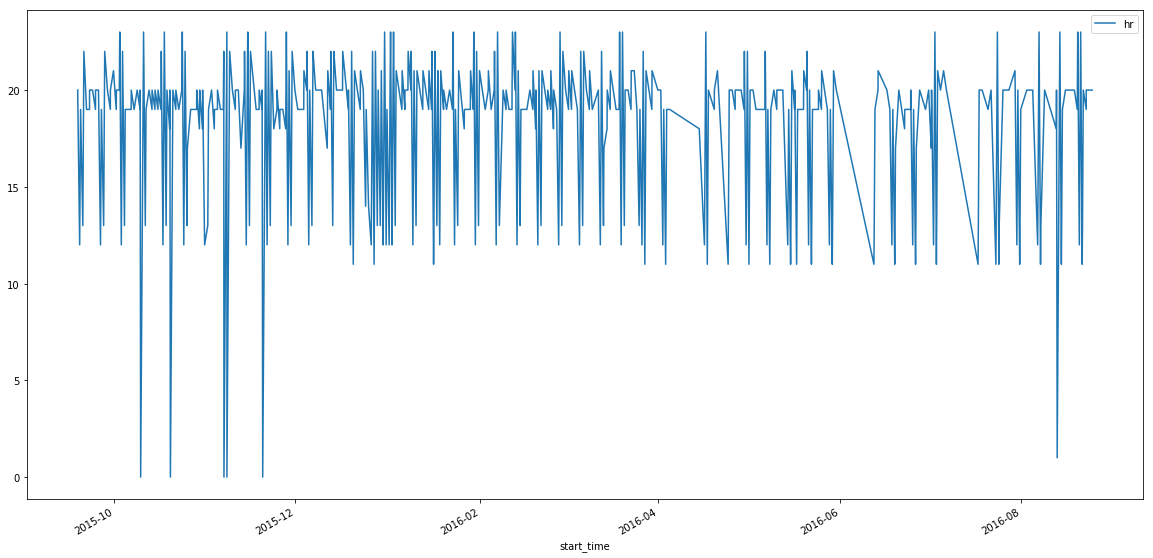

In [245]:
plot_timeline('B.B. King Blues Club & Grill')

/home/inonpe/jupyter/dtu_visualization_d3_course/project/py/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


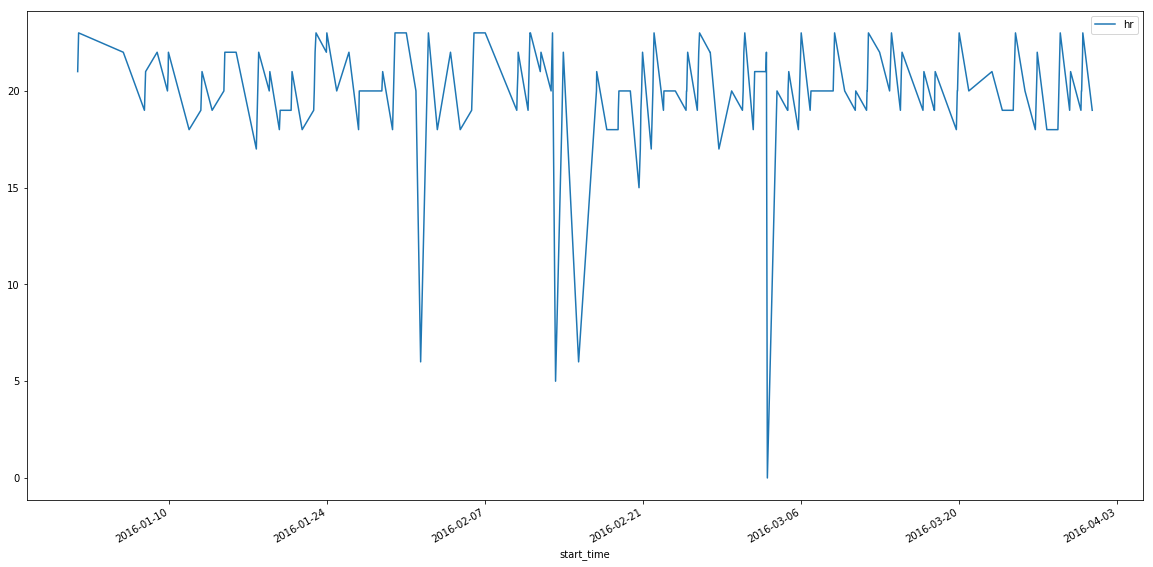

In [77]:
plot_timeline('Rockwood Music Hall')

/home/inonpe/jupyter/dtu_visualization_d3_course/project/py/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


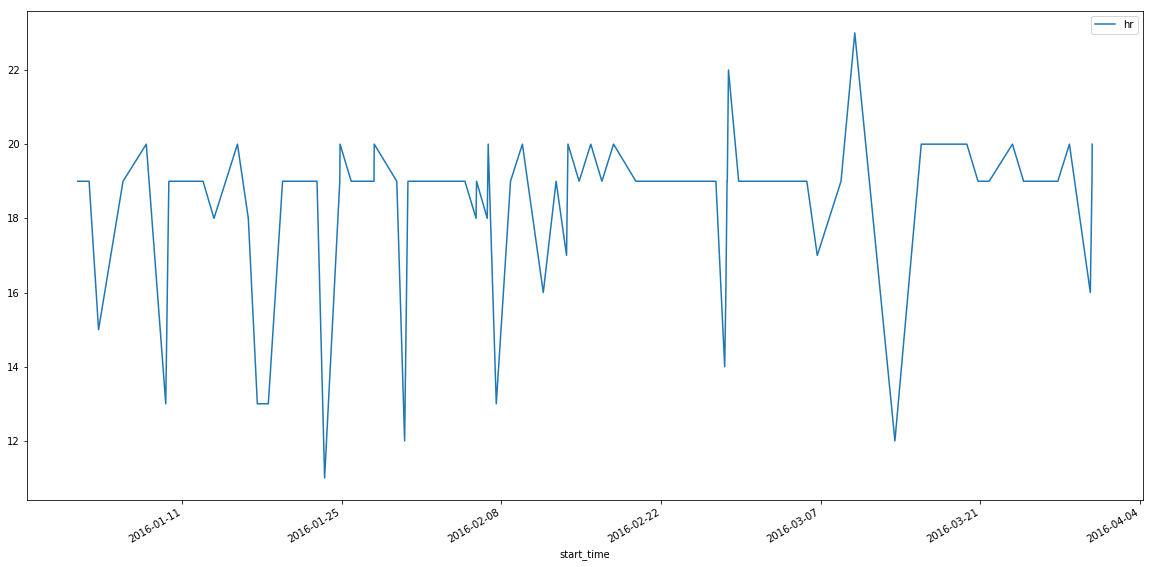

In [84]:
plot_timeline('Madison Square Garden')

# Venues for which we have Dropoffs

In [132]:
venues = [
    'barclays_center',
    'beacon_theatre',
    'bowery_ballroom',
    'carnegie_hall',
    'javits',
    'lincoln_center',
    'madison_square_garden',
    'moma',
    'music_hall_of_williamsburg',
    'playstation_theater',
    'radio_city_music_hall',
    'terminal_5',
    'the_town_hall'
]

In [133]:
for v in venues:
    vname = v.replace('_', ' ')
    print(vname, len(df[df.venue_escaped.str.lower().str.contains(vname).astype(bool)].venue_escaped.dropna()))

barclays center 204
beacon theatre 196
bowery ballroom 282
carnegie hall 79
javits 128
lincoln center 251
madison square garden 380
moma 158
music hall of williamsburg 165
playstation theater 74
radio city music hall 264
terminal 5 179
the town hall 78


In [135]:
df[df.venue_escaped.str.lower().str.contains('moma').astype(bool)].venue_escaped.dropna()

5038                                 MoMA PS1
6837                                 MoMA PS1
9518                                 MoMA PS1
9809                                 MoMA PS1
11599                                MoMA PS1
11630                                MoMA PS1
14079                                MoMA PS1
15439                                MoMA PS1
17640                                MoMA PS1
19561                                MoMA PS1
19572                                MoMA PS1
20108           MoMA The Museum of Modern Art
23087                                MoMA PS1
24745                                MoMA PS1
27584                                MoMA PS1
29737                                MoMA PS1
29794                                MoMA PS1
30270           MoMA The Museum of Modern Art
30660                     Artbook at MoMA PS1
30803                                MoMA PS1
31458                                MoMA PS1
32038                             

# Event Categories

In [220]:
c = [eval(e) for e in df.categories_escaped.dropna()]

In [214]:
l1 = functools.reduce(lambda l1, l2: l1 + l2, map(lambda lst: [e.lower() for e in lst], filter(lambda e: type(e) == list, c)))

In [225]:
l2 = []
for ctg in map(lambda e: e['category'], filter(lambda e: type(e) == dict, c)):
    try:
        l2.extend(ctg)
    except TypeError:
        pass
l2 = list(map(lambda e: e['id'], l2))

In [227]:
l = l1 + l2

In [229]:
import collections
sorted(collections.Counter(l).items(), key=lambda pair: -pair[1])

[('music', 5891),
 ('other', 5623),
 ('performing_arts', 3167),
 ('community', 2692),
 ('singles_social', 2419),
 ('family_fun_kids', 2077),
 ('food', 1414),
 ('outdoors_recreation', 1402),
 ('sports', 1293),
 ('business', 1246),
 ('movies_film', 1119),
 ('support', 1058),
 ('fundraisers', 838),
 ('art', 705),
 ('learning_education', 649),
 ('comedy', 636),
 ('attractions', 603),
 ('festivals_parades', 562),
 ('books', 535),
 ('schools_alumni', 510),
 ('holiday', 395),
 ('science', 317),
 ('conference', 292),
 ('technology', 270),
 ('religion_spirituality', 183),
 ('politics_activism', 143),
 ('clubs_associations', 126),
 ('entertainment', 92),
 ('sales', 86),
 ('animals', 64),
 ('concerts', 50),
 ('friendship-day', 47),
 ('workshops', 20),
 ('parties', 20),
 ('theatre', 15),
 ('performances', 11),
 ('literary-art', 10),
 ('trips-adventures', 9),
 ('festivals', 9),
 ('meetups', 8),
 ('dance', 7),
 ('health-wellness', 5),
 ('food-drinks', 4),
 ('cooking', 2),
 ('fine-arts', 1),
 ('exhib

# Data for D3

In [242]:
cols = ['id', 'source', 'start_time', 'latitude', 'longitude', 'venue_escaped']
for v in venues:
    vname = v.replace('_', ' ')
    selected = df.iloc[df[df.venue_escaped.str.lower().str.contains(vname).astype(bool)].venue_escaped.dropna().index][cols]
    selected.to_csv(os.path.join('for_d3', vname.replace(' ', '_') + '.csv'), index=False)

In [269]:
def daily_activity(venue_name):
    return df\
        [df.venue_escaped == venue_name]\
        [['start_time']]\
        .assign(day=lambda df: df.start_time.dt.date)\
        .groupby('day') \
        .count()\
        .sort_index()

for v in venues:
    vname = v.replace('_', ' ')
    daily_activity('Madison Square Garden').to_csv(os.path.join('for_d3', 'daily_event_count_' + v + '.csv'))
        
daily_activity('Madison Square Garden').head()

,start_time
day,
2015-09-19,1
2015-09-26,2
2015-10-01,2
2015-10-02,4
2015-10-03,1


In [268]:
def hourly_activity(venue_name):
    return df\
        [df.venue_escaped == venue_name]\
        [['start_time']]\
        .assign(hour=lambda df: df.start_time.dt.hour)\
        .groupby('hour') \
        .count()\
        .sort_index()

for v in venues:
    vname = v.replace('_', ' ')
    hourly_activity('Madison Square Garden').to_csv(os.path.join('for_d3', 'hourly_event_count_' + v + '.csv'))
        
hourly_activity('Madison Square Garden').transpose()

hour,0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
start_time,6,1,1,5,13,13,4,7,4,9,15,163,88,4,1,1


In [266]:
 df[df.venue_escaped == 'Madison Square Garden'].sort_values(by='start_time')

,48435,101524,34099,47025,27770,26253,28931,25450,45507,25178,...,105899,112444,108672,52904,49104,12965,55052,13410,14721,110583
id,29403736,26982334,29732569,29870043,26894281,29647899,28890671,29901698,29856256,29862519,...,E0-001-094405626-3,E0-001-088615844-9,E0-001-094769684-0,30092019,32385394,E0-001-088354933-0,30187568,E0-001-095905406-5,33214560,E0-001-095785417-9
source,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,timeoutworld,...,eventful,eventful,eventful,timeoutworld,timeoutworld,eventful,timeoutworld,eventful,timeoutworld,eventful
start_time,2015-09-19 20:00:00,2015-09-26 20:00:00,2015-09-26 20:30:00,2015-10-01 20:00:00,2015-10-01 20:00:00,2015-10-02 20:00:00,2015-10-02 20:00:00,2015-10-02 20:00:00,2015-10-02 20:00:00,2015-10-03 19:30:00,...,2016-08-11 19:30:00,2016-08-11 19:30:00,2016-08-13 19:00:00,2016-08-13 19:00:00,2016-08-13 20:00:00,2016-08-13 20:00:00,2016-08-13 20:00:00,2016-08-21 20:00:00,2016-08-21 20:00:00,2016-08-28 21:00:00
end_time,NaN,NaN,NaN,NaN,NaN,2015-10-03 01:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,...,40.7505,40.7505,40.7505,40.7505,40.7505,40.7505,40.7506,40.7505,40.7505,40.7505
longitude,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,-73.9928,...,-73.9934,-73.9934,-73.9934,-73.9929,-73.9929,-73.9934,-73.9928,-73.9934,-73.9929,-73.9934
postal_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10001,10001,10001,NaN,NaN,10001,NaN,10001,NaN,10001
all_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,NaN,0,NaN,0,NaN,0
free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
featured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
